# X 변수 분석

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

train_df = pd.read_csv("/Users/cdsjw/MLAutonomousDriving_workspace/Scikit/train.csv")

## 변수 간 상관 계수 분석

In [10]:
train_corr = train_df.drop(['X_04', 'X_23', 'X_47', 'X_48'], axis=1).corr() # pearson 상관관계 계수
train_corr_2 = train_corr.apply(lambda x : round(x,1)) # 반올림
train_corr.iloc[3,:].sort_values() # 보기 쉽게 내림차순 해보기

#plt.figure(figsize=(22,14))
#sns.heatmap(train_corr_2, cmap='RdBu_r', vmax=1, vmin=-1, annot=True, fmt='.1f')

X_27   -0.109535
X_28   -0.109337
X_29   -0.101049
X_26   -0.084017
X_45   -0.081658
          ...   
X_20    0.174889
X_19    0.187890
X_22    0.200955
X_01    0.553974
X_05    1.000000
Name: X_05, Length: 66, dtype: float64

## Group1 : PCB 체결 시 단계별 누름량

               X_01          X_02          X_05          X_06
count  39607.000000  39607.000000  39607.000000  39607.000000
mean      68.412040    103.320166    102.337203     70.597211
std        2.655983      0.000372      0.548353      2.259820
min       56.268000    103.320000    101.774000     61.726000
25%       66.465000    103.320000    101.949000     68.864000
50%       68.504000    103.320000    102.006000     69.884000
75%       69.524000    103.320000    103.144000     71.923000
max       84.820000    103.321000    103.160000     87.219000


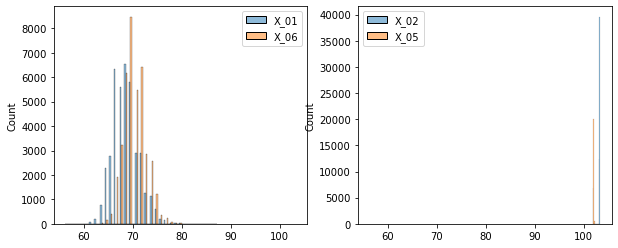

In [3]:
group1_1 = train_df.filter(items = ["X_01", "X_06"])
group1_2 = train_df.filter(items = ["X_02", "X_05"])
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.histplot(data=group1_1,bins = 100, ax = axes[0])
sns.histplot(data=group1_2,bins = 10, ax = axes[1])
print(train_df.filter(items = ["X_01", "X_02", "X_05","X_06"]).describe())

## Group2 : 방열 재료 무게

               X_03          X_10          X_11
count  39607.000000  39607.000000  39607.000000
mean      68.826354      0.002449      0.000366
std        5.151167      0.086255      0.014145
min       56.470000      0.000000      0.000000
25%       65.070000      0.000000      0.000000
50%       67.270000      0.000000      0.000000
75%       71.770000      0.000000      0.000000
max       89.170000      3.600000      0.700000


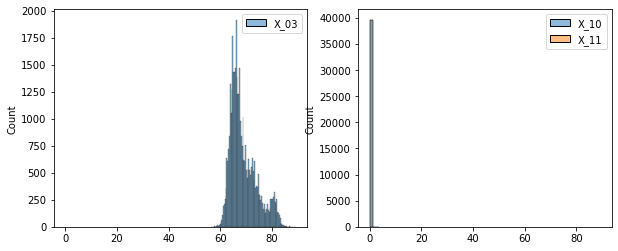

In [4]:
group2_1 = train_df.filter(items = ["X_03"])
group2_2 = train_df.filter(items = ["X_10", "X_11"])
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.histplot(data=group2_1,bins = 100, ax = axes[0])
sns.histplot(data=group2_2,bins = 3, ax = axes[1])
print(train_df.filter(items = ["X_03", "X_10", "X_11"]).describe())

## Group3 : 통과 여부

          X_04     X_23     X_47     X_48
count  39607.0  39607.0  39607.0  39607.0
mean       1.0      1.0      1.0      1.0
std        0.0      0.0      0.0      0.0
min        1.0      1.0      1.0      1.0
25%        1.0      1.0      1.0      1.0
50%        1.0      1.0      1.0      1.0
75%        1.0      1.0      1.0      1.0
max        1.0      1.0      1.0      1.0


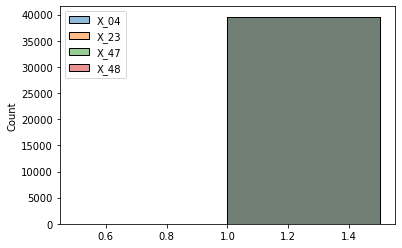

In [5]:
group3 = train_df.filter(items = ["X_04", "X_23", "X_47", "X_48"])
sns.histplot(data=group3,bins = 2)
print(train_df.filter(items = ["X_04", "X_23", "X_47", "X_48"]).describe())

## Group4 : 방열 재료 면적

               X_07          X_08          X_09
count  39607.000000  39607.000000  39607.000000
mean      29.407490    164.449320    225.397470
std        7.338204    220.402444     66.734725
min       14.140000     38.460000     37.580000
25%       27.890000    105.990000    188.540000
50%       28.840000    115.040000    234.450000
75%       29.870000    132.620000    263.960000
max      163.860000   2387.440000    637.490000


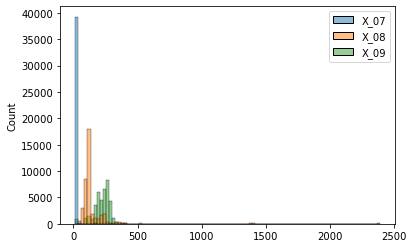

In [6]:
group4 = train_df.filter(items = ["X_07", "X_08", "X_09"])
sns.histplot(data=group4,bins = 100)
print(train_df.filter(items = ["X_07", "X_08", "X_09"]).describe())

## Group 5 : 커넥터 위치 기준 좌표 

               X_12
count  39607.000000
mean       4.373228
std        0.021806
min        4.270000
25%        4.360000
50%        4.370000
75%        4.390000
max        4.490000


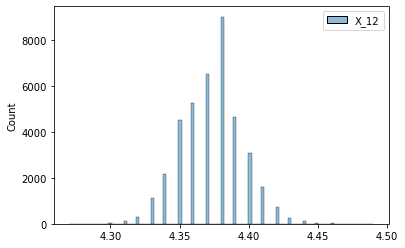

In [7]:
group5 = train_df.filter(items = ["X_12"])
sns.histplot(data=group5,bins = 100)
print(train_df.filter(items = ["X_12"]).describe())

## Group 6 : 각 안테나 패드 위치(높이) 차이

               X_13
count  39607.000000
mean       0.143335
std        0.025334
min        0.050000
25%        0.130000
50%        0.140000
75%        0.160000
max        0.280000


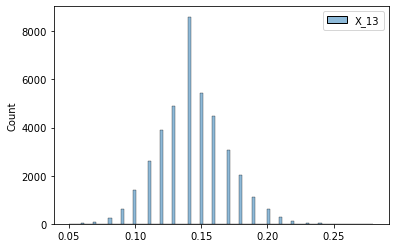

In [8]:
group6 = train_df.filter(items = ["X_13"])
sns.histplot(data=group6,bins = 100)
print(train_df.filter(items = ["X_13"]).describe())

## Group 7 : 안테나 패드 위치

               X_14          X_15          X_16          X_17          X_18
count  39607.000000  39607.000000  39607.000000  39607.000000  39607.000000
mean      13.372201     13.381914     13.463860     13.512589     13.449263
std        0.029865      0.029468      0.036741      0.023436      0.029093
min       13.150000     13.230000     13.260000     13.410000     13.260000
25%       13.350000     13.360000     13.440000     13.500000     13.430000
50%       13.370000     13.380000     13.470000     13.510000     13.450000
75%       13.390000     13.410000     13.490000     13.530000     13.470000
max       13.490000     13.500000     13.610000     13.610000     13.570000


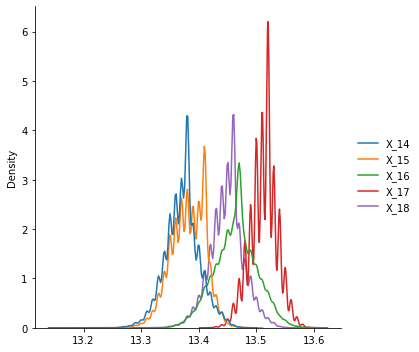

In [9]:
group7 = train_df.filter(items = ["X_14", "X_15", "X_16", "X_17", "X_18"])
sns.displot(data=group7, kind = "kde")
print(train_df.filter(items = ["X_14", "X_15", "X_16", "X_17", "X_18"]).describe())

## Group 8 : *번 스크류 삽입 깊이

               X_19          X_20          X_21          X_22
count  39607.000000  39607.000000  39607.000000  39607.000000
mean       3.240229      3.184493      3.174270      3.232673
std        0.110482      0.105266      0.106868      0.108981
min        2.860000      2.830000      2.830000      2.850000
25%        3.160000      3.100000      3.090000      3.140000
50%        3.220000      3.180000      3.160000      3.230000
75%        3.310000      3.270000      3.250000      3.320000
max        3.750000      3.670000      3.680000      3.790000


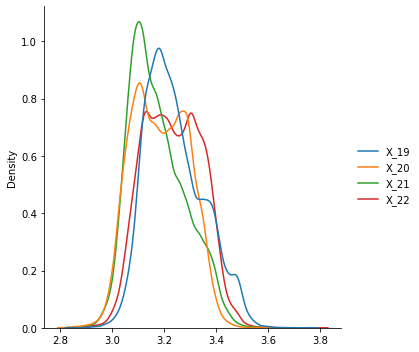

In [10]:
group8 = train_df.filter(items = ["X_19", "X_20", "X_21", "X_22"])
sns.displot(data=group8, kind = "kde")
print(train_df.filter(items = ["X_19", "X_20", "X_21", "X_22"]).describe())

## Group 9 : 커넥터 핀 치수

               X_24          X_25          X_26          X_27          X_28  \
count  39607.000000  39607.000000  39607.000000  39607.000000  39607.000000   
mean       2.115674      2.093895      2.090377      2.098249      2.118594   
std        0.032440      0.033148      0.038512      0.038056      0.042782   
min        1.830000      1.960000      1.980000      1.990000      1.930000   
25%        2.090000      2.070000      2.060000      2.070000      2.090000   
50%        2.120000      2.090000      2.090000      2.090000      2.120000   
75%        2.140000      2.120000      2.120000      2.120000      2.140000   
max        2.350000      2.350000      2.350000      2.350000      2.350000   

               X_29  
count  39607.000000  
mean       2.173727  
std        0.046689  
min        2.020000  
25%        2.140000  
50%        2.170000  
75%        2.200000  
max        2.360000  


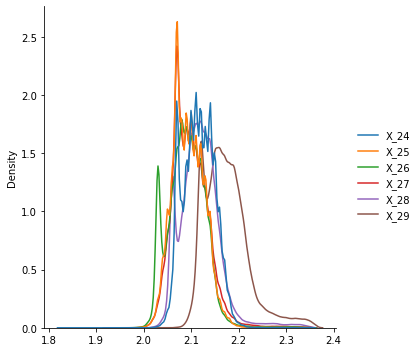

In [11]:
group9 = train_df.filter(items = ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"])
sns.displot(data=group9, kind = "kde")
print(train_df.filter(items = ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"]).describe())

# Group 10 : 스크류 삽입 깊이

               X_30          X_31          X_32          X_33
count  39607.000000  39607.000000  39607.000000  39607.000000
mean       1.378994      1.571141      1.362929      1.595723
std        0.030412      0.074520      0.029945      0.108028
min        0.570000      0.600000      0.570000      0.610000
25%        1.370000      1.530000      1.350000      1.550000
50%        1.370000      1.550000      1.360000      1.570000
75%        1.380000      1.600000      1.370000      1.610000
max        2.110000      7.210000      2.450000      7.810000


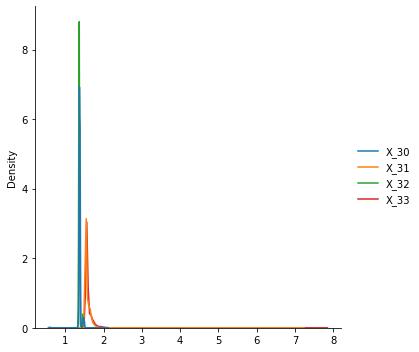

In [12]:
group10 = train_df.filter(items = ["X_30", "X_31", "X_32", "X_33"])
sns.displot(data=group10, kind = "kde")
print(train_df.filter(items = ["X_30", "X_31", "X_32", "X_33"]).describe())

## Group 11 : 스크류 체결 시 분당 회전 수

               X_34          X_35          X_36          X_37
count  39607.000000  39607.000000  39607.000000  39607.000000
mean      12.950271     12.920343     12.941728     12.919139
std        0.044030      0.052238      0.047830      0.052292
min       12.840000     12.810000     12.840000     12.810000
25%       12.920000     12.870000     12.900000     12.870000
50%       12.960000     12.920000     12.950000     12.910000
75%       12.990000     12.970000     12.980000     12.970000
max       13.080000     13.090000     13.090000     13.080000


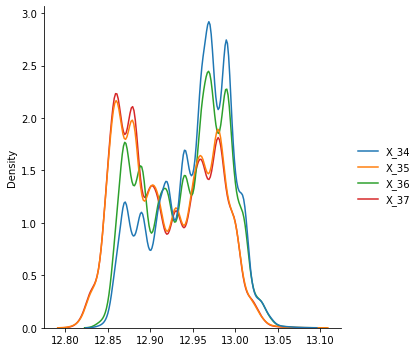

In [13]:
group11 = train_df.filter(items = ["X_34", "X_35", "X_36", "X_37"])
sns.displot(data=group11, kind = "kde")
print(train_df.filter(items = ["X_34", "X_35", "X_36", "X_37"]).describe())

## Group 12 : 하우징 PCB 안착부

               X_38          X_39          X_40
count  39607.000000  39607.000000  39607.000000
mean     -15.903737    -15.889576    -16.572162
std        0.595420      0.746665      0.344486
min      -17.090000    -17.090000    -17.720000
25%      -16.160000    -16.160000    -16.810000
50%      -15.990000    -15.990000    -16.640000
75%      -15.750000    -15.750000    -16.400000
max       32.230000     -2.650000    -14.800000


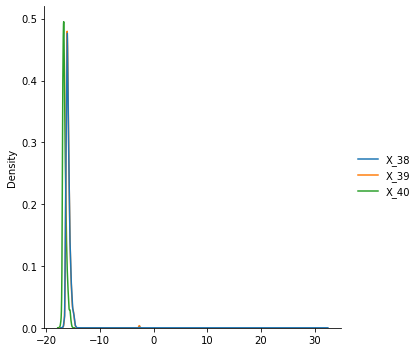

In [14]:
group12 = train_df.filter(items = ["X_38", "X_39", "X_40"])
sns.displot(data=group12, kind = "kde")
print(train_df.filter(items = ["X_38", "X_39", "X_40"]).describe())

## Group 13 : 레이돔 치수 (안테나 *번 부위)

               X_41          X_42          X_43          X_44
count  39607.000000  39607.000000  39607.000000  39607.000000
mean      21.186992     21.059334     21.203705     21.160107
std        0.031128      0.040288      0.047211      0.042176
min       20.730000     20.790000     20.800000     20.930000
25%       21.170000     21.030000     21.170000     21.130000
50%       21.190000     21.060000     21.200000     21.160000
75%       21.210000     21.090000     21.240000     21.190000
max       21.620000     21.440000     21.410000     21.320000


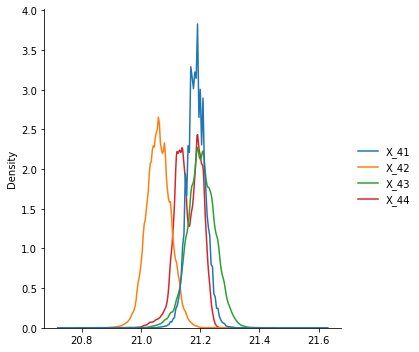

In [15]:
group13 = train_df.filter(items = ["X_41", "X_42", "X_43", "X_44"])
sns.displot(data=group13, kind = "kde")
print(train_df.filter(items = ["X_41", "X_42", "X_43", "X_44"]).describe())

## Group 14 : 안테나 부분 레이돔 기울기

               X_45
count  39607.000000
mean       0.154567
std        0.046968
min        0.000000
25%        0.120000
50%        0.150000
75%        0.190000
max        0.420000


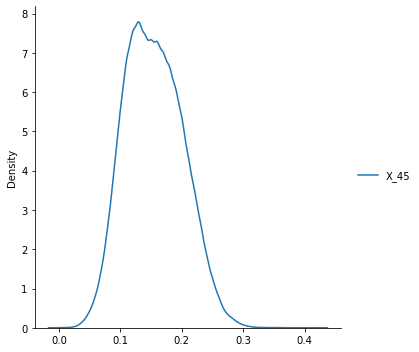

In [16]:
group14 = train_df.filter(items = ["X_45"])
sns.displot(data=group14, kind = "kde")
print(train_df.filter(items = ["X_45"]).describe())

## Group 15 : 실란트 본드 소요량

               X_46
count  39607.000000
mean    1468.275305
std        2.121517
min     1457.000000
25%     1469.000000
50%     1469.000000
75%     1469.000000
max     1469.000000


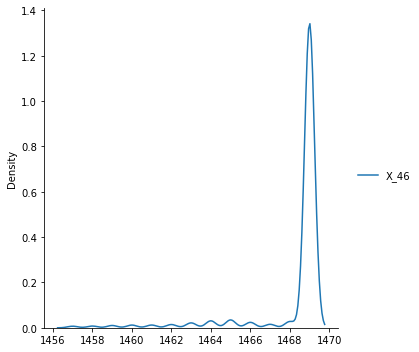

In [17]:
group15 = train_df.filter(items = ["X_46"])
sns.displot(data=group15, kind = "kde")
print(train_df.filter(items = ["X_46"]).describe())

## Group 16 : Cal 투입 전 대기 시간

                X_49
count   39607.000000
mean    16676.913639
std      8584.427420
min      3341.830000
25%     13093.930000
50%     15273.330000
75%     17560.180000
max    114563.630000


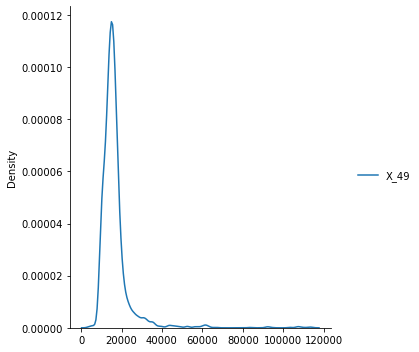

In [18]:
group16 = train_df.filter(items = ["X_49"])
sns.displot(data=group16, kind = "kde")
print(train_df.filter(items = ["X_49"]).describe())

## Group 17 : RF* 부분 SMT 납 량

               X_50          X_51          X_52          X_53          X_54  \
count  39607.000000  39607.000000  39607.000000  39607.000000  39607.000000   
mean     130.774557    131.457418    138.587595    127.992420    128.014110   
std        5.989845      5.934313      6.469813      5.713153      5.433958   
min       21.800000     21.910000     23.100000     21.330000     21.340000   
25%      126.948571    127.669758    134.475401    124.374525    124.697879   
50%      130.723378    131.352856    138.525575    128.020010    128.098728   
75%      134.538998    135.170761    142.702448    131.618662    131.487423   
max      162.619458    194.513195    173.438623    152.406630    175.052891   

               X_55          X_56  
count  39607.000000  39607.000000  
mean     137.884711    128.441119  
std        6.552101      5.444245  
min       22.980000     21.410000  
25%      133.744103    125.134713  
50%      137.900952    128.414501  
75%      142.073102    131.839764  


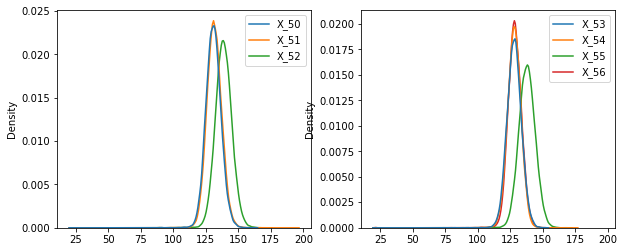

In [43]:
group16_1 = train_df.filter(items = ["X_50", "X_51", "X_52"])
group16_2 = train_df.filter(items = ["X_53", "X_54", "X_55", "X_56"])
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
#sns.histplot(data=group16_1,kde = True, fill = False, ax = axes[0])
#sns.histplot(data=group16_2, kde = True, fill = False, ax = axes[1])
sns.kdeplot(data=group16_1,ax = axes[0])
sns.kdeplot(data=group16_2, ax = axes[1])
print(train_df.filter(items = ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"]).describe())

# Y 변수당 X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [37]:
variables = train_df.columns[1:57].tolist() ## 설명 변수 리스트
y = train_df['Y_01'] ## 반응 변수

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder,dtype='float64') ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = train_df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = train_df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(train_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [42]:
selected_variables


['X_23',
 'X_22',
 'X_19',
 'X_18',
 'X_52',
 'X_17',
 'X_45',
 'X_13',
 'X_49',
 'X_51',
 'X_40',
 'X_46',
 'X_48',
 'X_04',
 'X_47',
 'X_03',
 'X_06',
 'X_20',
 'X_05',
 'X_27',
 'X_24',
 'X_07',
 'X_21',
 'X_15',
 'X_43',
 'X_42',
 'X_33',
 'X_41',
 'X_56',
 'X_30',
 'X_31',
 'X_25',
 'X_39']